<a href="https://colab.research.google.com/github/Saurabh8734/Machine-Learning/blob/main/test_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=4f0f2d6375ffc538545cfa7baede98f178839733a7974862dd00b77f73baeaa4
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 5,330 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e0

In [ ]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



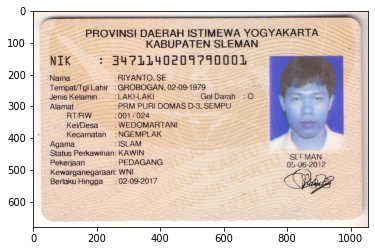

In [ ]:
img = cv2.imread("/content/ktp.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [ ]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [ ]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")

print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

     level  page_num  block_num  par_num  line_num  word_num  left  top  \
0        1         1          0        0         0         0     0    0   
1        2         1          1        0         0         0    52   14   
2        3         1          1        1         0         0    52   14   
3        4         1          1        1         1         0    52   14   
4        5         1          1        1         1         1    52   14   
..     ...       ...        ...      ...       ...       ...   ...  ...   
100      5         1          8        1         2         1   800  544   
101      2         1          9        0         0         0   800  515   
102      3         1          9        1         0         0   800  515   
103      4         1          9        1         1         0   800  515   
104      5         1          9        1         1         1   800  515   

     width  height  conf text  
0     1055     680    -1  NaN  
1      950      12    -1 

In [ ]:
from pytesseract import Output

img = cv2.imread('ktp.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


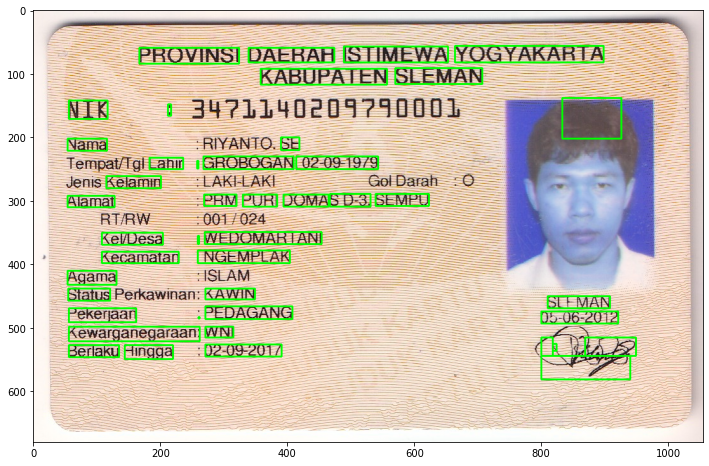

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)